# Pymaceuticals Inc.

## Observations & Inferences

1. Tumor volume information for all tested drugs show that Capomulin and Ramicane have the lowest values of variance and consequently standard deviation, proving the reliability of the drugs. On the other hand, Ketapril and Naftisol resulted in the largest variance in tumor volumes of treated mice -- unsuitable for tumor treatment. 

2. Mice treated with Capomulin and Ramicane also showed the smallest tumor volume after treatment without any outlier, suggesting the effectiveness of the drugs on tumors. 

3. The correlation coefficient between mouse weight and the average tumor volume is 0.84 (last graph), suggesting a strong relation between the two values. Simply put, the heavier the weight of the mouse, the larger the tumor volume. 

### Analysis

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# check number of mice

n_of_mice = combined_df['Mouse ID'].nunique()
n_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = np.array(combined_df['Mouse ID'][combined_df.duplicated()])
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df.loc[(combined_df['Mouse ID'] == 'g989')]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mice_id)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
n_of_mice1 = cleaned_df['Mouse ID'].nunique()
n_of_mice1

248

## Summary Statistics

In [7]:
#groupby by drug regimen
df = cleaned_df.groupby(['Drug Regimen'])

#make dataframe of mean, median, variance, stdev, sem of tumor volume (mm3)
mean_df = df[["Tumor Volume (mm3)"]].mean()
median_df = df[["Tumor Volume (mm3)"]].median()
variance_df = df.var()[["Tumor Volume (mm3)"]]
std_df = df.std()[["Tumor Volume (mm3)"]]
standarderror_df = df.sem()[["Tumor Volume (mm3)"]]

#assemble above data into one dataframe
sumstats_df = pd.DataFrame()

sumstats_df["Mean Tumor Volume"] = mean_df 
sumstats_df["Median Tumor Volume"]= median_df
sumstats_df["Tumor Volume Variance"]= variance_df 
sumstats_df["Tumor Volume Std. Dev."] = std_df
sumstats_df["Tumor Volume Std. Err."] = standarderror_df

sumstats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#same summary using df.agg

agg_sumstats_df = df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_sumstats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

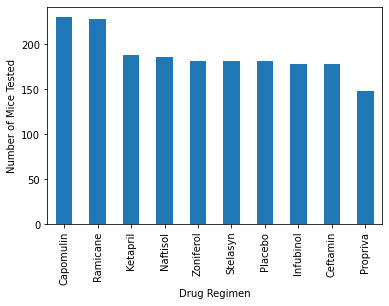

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
cleaned_df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

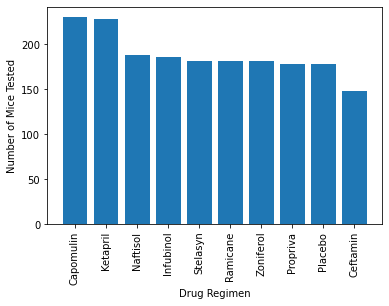

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = cleaned_df['Drug Regimen'].unique().tolist()
y_values = cleaned_df['Drug Regimen'].value_counts().tolist()

plt.bar(x_values, y_values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()

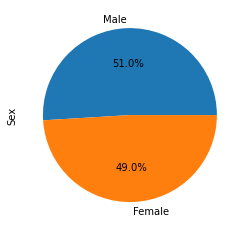

In [11]:
cleaned_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%');

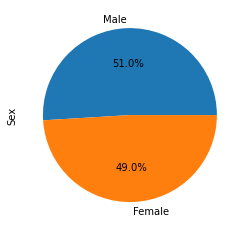

In [12]:
plt.pie(cleaned_df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltv_df = cleaned_df.copy()
finaltv_df = finaltv_df.groupby(['Mouse ID'])[['Timepoint']].max()
finaltv_df.reset_index(inplace = True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = finaltv_df.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(volume)

    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.75])
    quartiles = quartiles.squeeze()
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine potential outliers for each drug
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]

    print(f"{drug}'s potential outliers:{outliers}")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/lt/xhwk7z354rl1rjbqlbct1dcm0000gn/T/ipykernel_85828/697403773.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


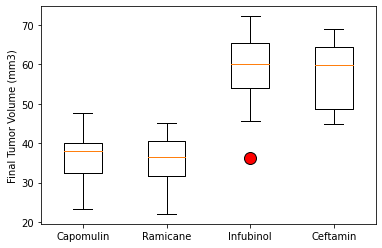

In [48]:
# Format flierprops
fig, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol_data, flierprops = flierprops);

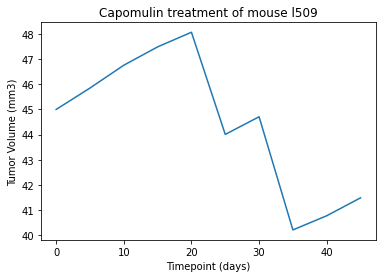

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#make df with drug regimen = capomulin and mouse id = l509
capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') & 
                               (combined_df['Mouse ID'] == 'l509')]

# create line graph with x/y labels and title 
capomulin_line = capomulin_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', legend=False)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()



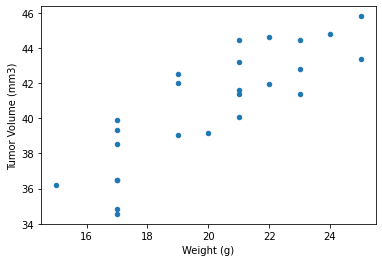

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#locate rows with drug regimen = capomulin
capomulin_df2 = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# groupby mouse id 
cap3 = capomulin_df2.groupby(capomulin_df2['Mouse ID']).mean()

#make scatter plot
scatterplot = cap3.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)');

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


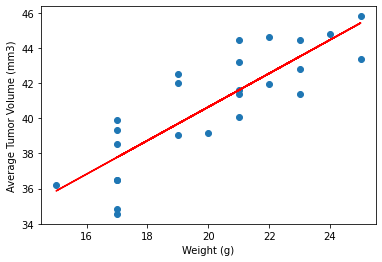

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find correlation coefficient
corr_coe = "{:.2f}".format(cap3.corr().loc['Tumor Volume (mm3)']['Weight (g)'])
print(f"The correlation between mouse weight and the average tumor volume is {corr_coe}")

#find linear regression
x_values = cap3['Weight (g)']
y_values = cap3['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
